In [1]:
### Analysis of Ensemble 11 and 12 together (each 216 members)
### Both ensembles are similar to 9 and 10
### Difference are the sampled values of m_l, m_q, µ0, phi and ligphi
### Importantly m_q is fixed and 4 different m_l values are investigated
### And the phi and ligphi values are set to higher values
### The input parameters for the both ensembles are exactly the same except for the conditional stability constant
### Ensemble 11 has beta = 1E9, Ensemble 12 has beta = 1E12
### Time: 10000 years
### Timestep: 0.5 days

In [2]:
### Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib as mpl

from matplotlib.colors import ListedColormap, BoundaryNorm, LogNorm
from matplotlib.cm import ScalarMappable

plt.rcParams['text.usetex'] = True

# Enable the use of LaTeX for rendering text labels
mpl.rcParams['text.usetex'] = True

# Set the font family to sans-serif (Helvetica, Arial, etc.)
mpl.rcParams['font.family'] = 'sans-serif'

# Set the font style for the labels (optional)
mpl.rcParams['font.style'] = 'normal'

# Add a LaTeX preamble to change font family for numbers to sans-serif
mpl.rcParams['text.latex.preamble'] = r'\usepackage{sfmath}'


os.getcwd()


'c:\\Users\\konst\\Documents\\_Master_Thesis\\Code\\microCOSM_deep\\Ensemble11_12'

In [3]:
data11 = pd.read_csv('Ensemble11.csv', sep=' ')

In [4]:
data11.head()

,id,dt(s),t(yr),rFeC_pb,mu0,m_l,m_q,kappa,kfe_p,kldoc_p,...,DIC(2),DIC(3),ALK(1),ALK(2),ALK(3),OCPCO2(1),OCPCO2(2),OCPCO2(3),ATPCO2,Limit
0,50000.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2121.243562,2351.656354,2393.333530,2393.285984,2402.961310,266.061591,291.176794,597.405006,0.0,224.0
1,50001.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2121.141931,2352.288071,2393.209249,2393.161547,2402.866278,266.065599,291.175437,601.631786,0.0,224.0
2,50002.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2121.124649,2352.394871,2393.188118,2393.140389,2402.850121,266.066227,291.175203,602.350502,0.0,224.0
3,50003.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2124.799336,2333.272264,2397.676834,2397.636583,2405.867438,266.003429,291.228750,488.536263,0.0,224.0
4,50004.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2124.628718,2334.323152,2397.468229,2397.427734,2405.705564,266.007961,291.226353,494.017741,0.0,224.0


In [5]:
data11.shape

(216, 45)

In [6]:
### Add column

data11['fe_lim_p(1)'] = (data11['Fe(1)'] / (data11['Fe(1)'] + data11['kfe_p'] * 1e6)) / (data11['LDOC(1)'] / (data11['LDOC(1)'] + data11['kldoc_p'] * 1e3)) < 1
data11['fe_lim_p(2)'] = (data11['Fe(2)'] / (data11['Fe(2)'] + data11['kfe_p'] * 1e6)) / (data11['LDOC(2)'] / (data11['LDOC(2)'] + data11['kldoc_p'] * 1e3)) < 1
data11['fe_lim_p(3)'] = (data11['Fe(3)'] / (data11['Fe(3)'] + data11['kfe_p'] * 1e6)) / (data11['LDOC(3)'] / (data11['LDOC(3)'] + data11['kldoc_p'] * 1e3)) < 1

In [7]:
data11.head()

,id,dt(s),t(yr),rFeC_pb,mu0,m_l,m_q,kappa,kfe_p,kldoc_p,...,ALK(2),ALK(3),OCPCO2(1),OCPCO2(2),OCPCO2(3),ATPCO2,Limit,fe_lim_p(1),fe_lim_p(2),fe_lim_p(3)
0,50000.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2393.285984,2402.961310,266.061591,291.176794,597.405006,0.0,224.0,True,True,True
1,50001.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2393.161547,2402.866278,266.065599,291.175437,601.631786,0.0,224.0,True,True,True
2,50002.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2393.140389,2402.850121,266.066227,291.175203,602.350502,0.0,224.0,True,True,True
3,50003.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2397.636583,2405.867438,266.003429,291.228750,488.536263,0.0,224.0,True,True,True
4,50004.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2397.427734,2405.705564,266.007961,291.226353,494.017741,0.0,224.0,True,True,True


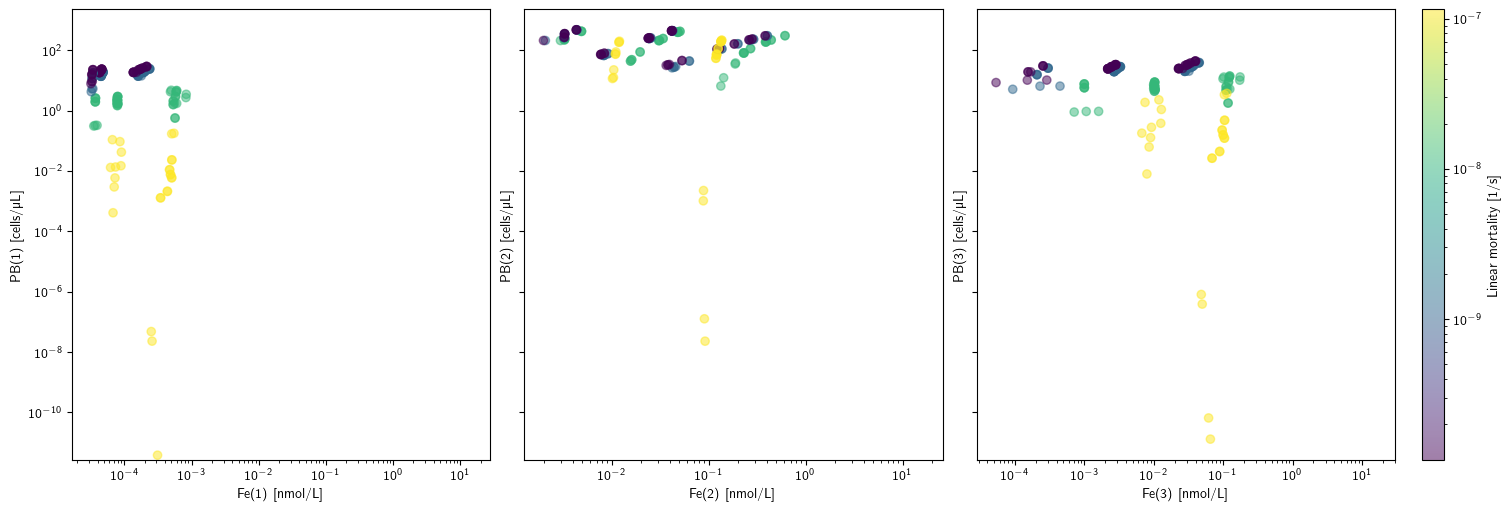

In [10]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data11['Fe(1)'], data11['PB(1)'], c=data11['m_l'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data11['Fe(2)'], data11['PB(2)'], c=data11['m_l'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data11['Fe(3)'], data11['PB(3)'], c=data11['m_l'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Linear mortality [1/s]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### It is pretty much the mortality that determines the prokaryotic abundance


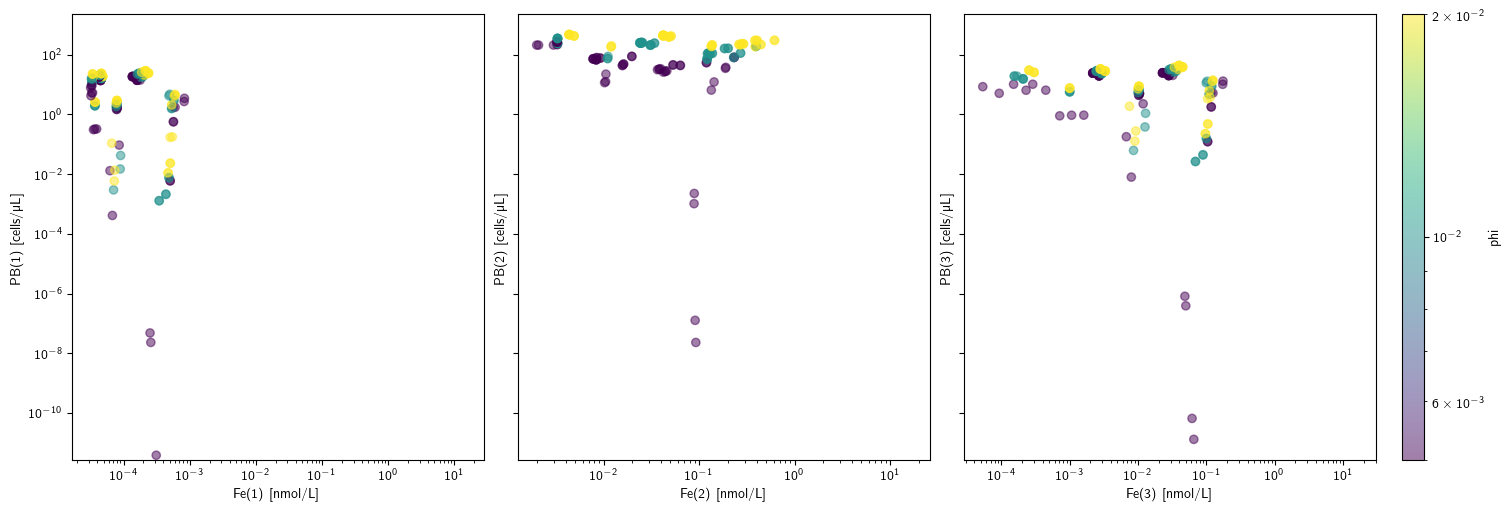

In [11]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data11['Fe(1)'], data11['PB(1)'], c=data11['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data11['Fe(2)'], data11['PB(2)'], c=data11['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data11['Fe(3)'], data11['PB(3)'], c=data11['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### Not a single run has enough Fe(3) concentration



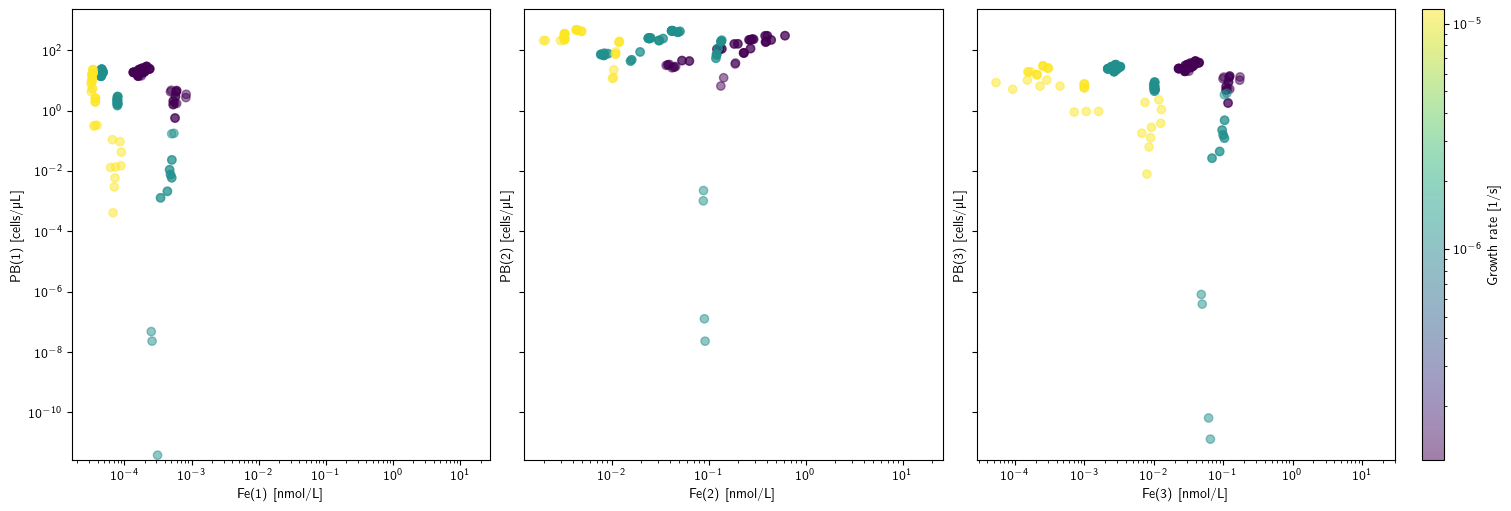

In [12]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data11['Fe(1)'], data11['PB(1)'], c=data11['mu0'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data11['Fe(2)'], data11['PB(2)'], c=data11['mu0'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data11['Fe(3)'], data11['PB(3)'], c=data11['mu0'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Growth rate [1/s]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### Super interesting, low maximum growth rate necessary, otherwise the Fe concentration is too low
### Can be understood by the speed of PB cycling determining the ligand sink

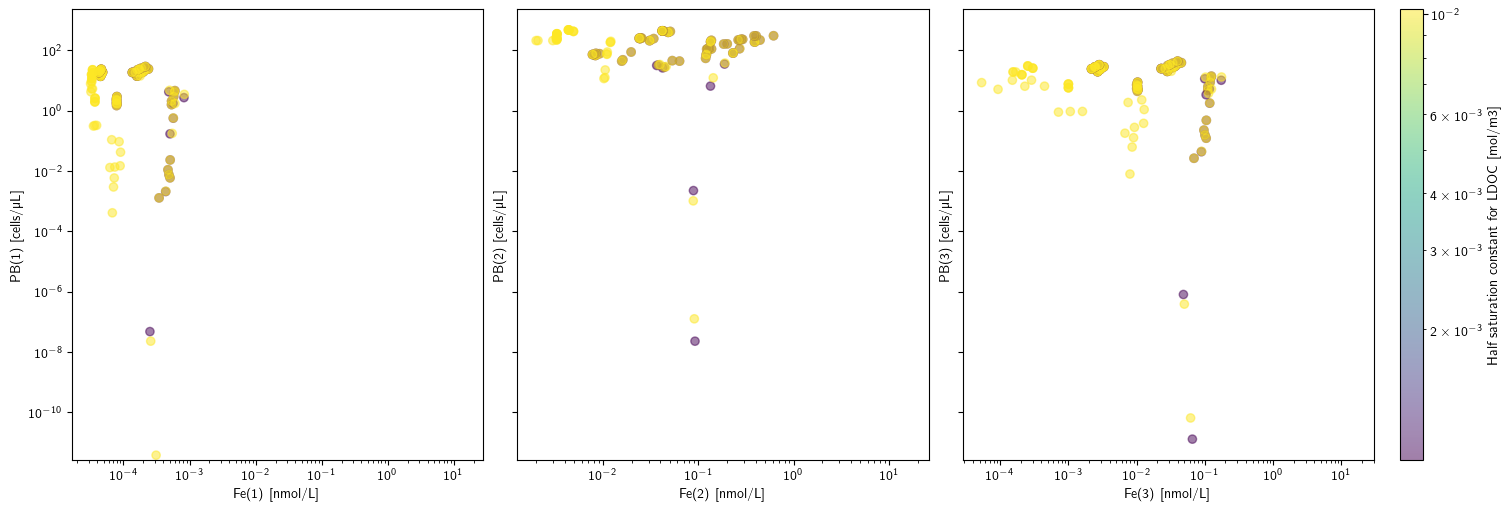

In [14]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data11['Fe(1)'], data11['PB(1)'], c=data11['kldoc_p'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data11['Fe(2)'], data11['PB(2)'], c=data11['kldoc_p'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data11['Fe(3)'], data11['PB(3)'], c=data11['kldoc_p'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Half saturation constant for LDOC [mol/m3]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### K_LDOC does not seem have any effect here, could be related to limitation regime


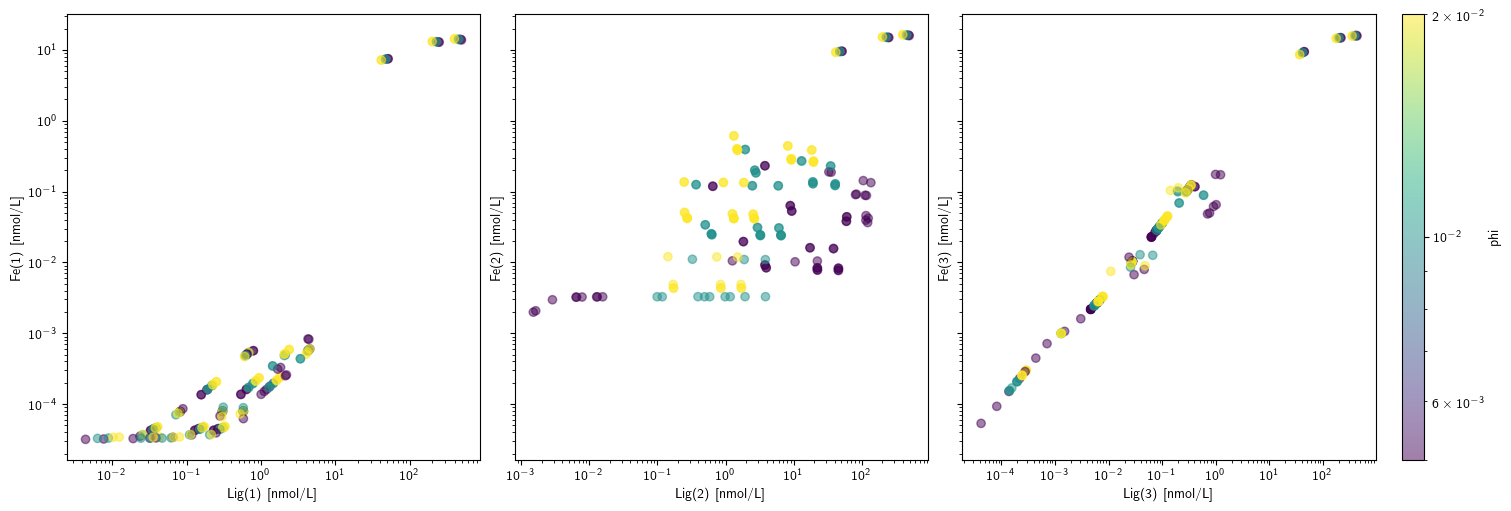

In [15]:
### Scatterplot of Fe(3) vs Lig(3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data11['Lig(1)'], data11['Fe(1)'], c=data11['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Lig(1) [nmol/L]')
axs[0].set_ylabel('Fe(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data11['Lig(2)'], data11['Fe(2)'], c=data11['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Lig(2) [nmol/L]')
axs[1].set_ylabel('Fe(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data11['Lig(3)'], data11['Fe(3)'], c=data11['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Lig(3) [nmol/L]')
axs[2].set_ylabel('Fe(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()





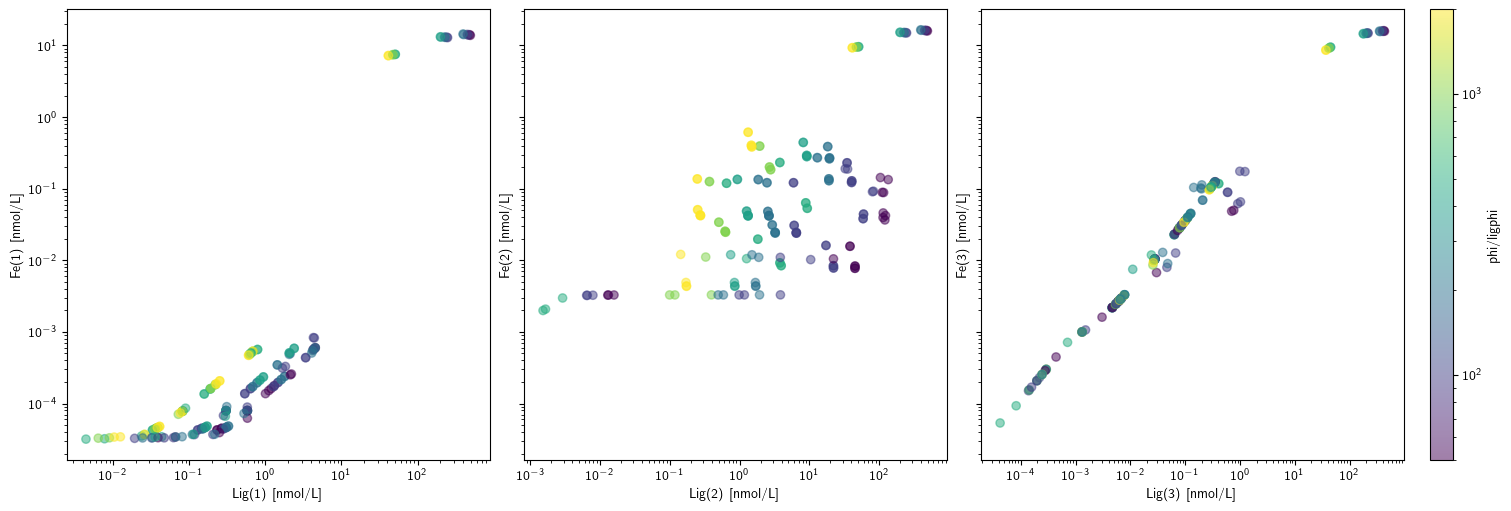

In [16]:
### Scatterplot of Fe(3) vs Lig(3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data11['Lig(1)'], data11['Fe(1)'], c=data11['phi']/data11['ligphi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Lig(1) [nmol/L]')
axs[0].set_ylabel('Fe(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data11['Lig(2)'], data11['Fe(2)'], c=data11['phi']/data11['ligphi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Lig(2) [nmol/L]')
axs[1].set_ylabel('Fe(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data11['Lig(3)'], data11['Fe(3)'], c=data11['phi']/data11['ligphi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Lig(3) [nmol/L]')
axs[2].set_ylabel('Fe(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi/ligphi')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()





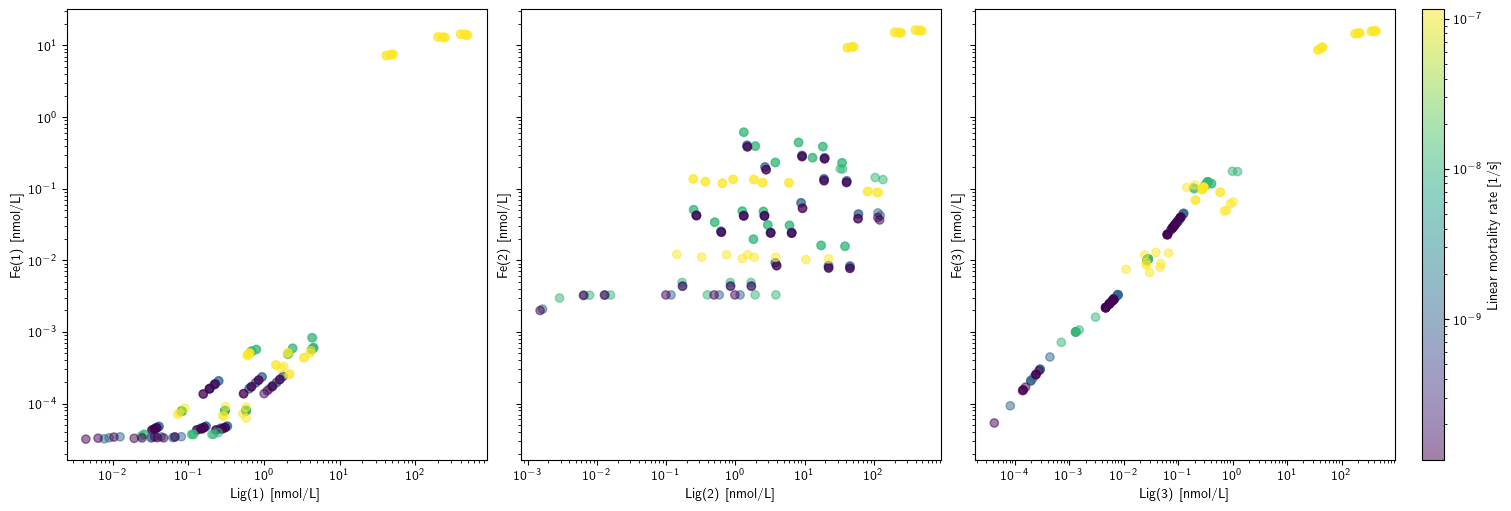

In [17]:
### Scatterplot of Fe(3) vs Lig(3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data11['Lig(1)'], data11['Fe(1)'], c=data11['m_l'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Lig(1) [nmol/L]')
axs[0].set_ylabel('Fe(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data11['Lig(2)'], data11['Fe(2)'], c=data11['m_l'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Lig(2) [nmol/L]')
axs[1].set_ylabel('Fe(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data11['Lig(3)'], data11['Fe(3)'], c=data11['m_l'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Lig(3) [nmol/L]')
axs[2].set_ylabel('Fe(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Linear mortality rate [1/s]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()



